In [1]:
from virtart.object_detector import ObjectDetector
from PIL import Image
import numpy as np
import warnings
warnings.filterwarnings('ignore')
object_detector = ObjectDetector(device='gpu')

Loading checkpoint from checkpoints/yolov6n.pt

Fusing model...


# Presenting YOLOV6 Model
In this notebook we inspect how the YOLOV6 model operates and how the object detection works.
For visualization we look at the famous picture of Cristiano Ronaldo playing chess against Lionel Messi.


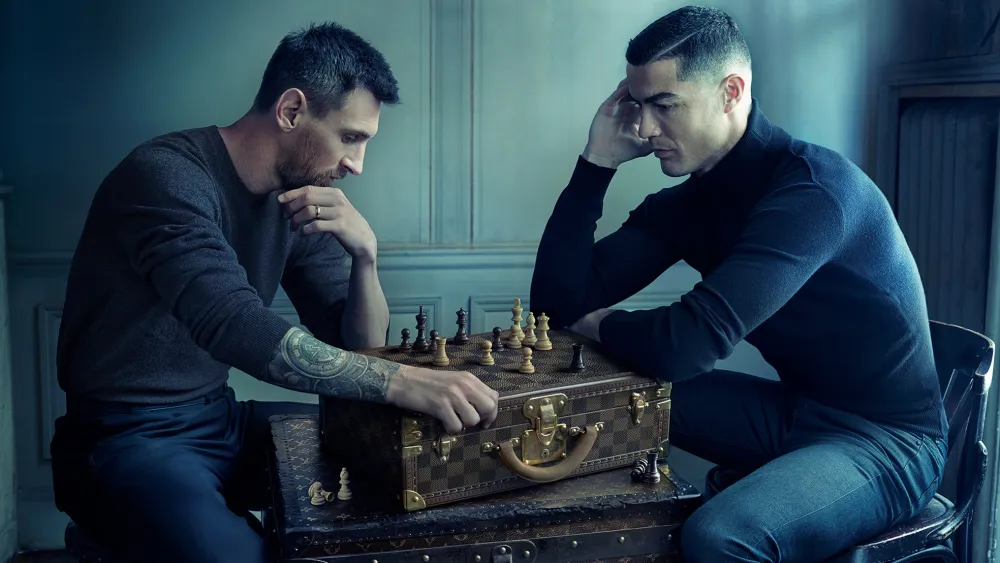

In [2]:
img = Image.open('imgs/CR7_Messi.jpg')
img_numpy = np.array(img)
img

# Objects detected:
These are the objects that are detected by the YOLOV6 model together with the confidence of that detection:

In [3]:
detections = object_detector(img_numpy)
detections

[{'class': 'chair',
  'bbox': [692.0, 317.0, 992.0, 560.0],
  'conf': 0.2536589503288269},
 {'class': 'bottle',
  'bbox': [452.0, 309.0, 464.0, 340.0],
  'conf': 0.25823432207107544},
 {'class': 'bottle',
  'bbox': [513.0, 304.0, 531.0, 367.0],
  'conf': 0.27345532178878784},
 {'class': 'bottle',
  'bbox': [448.0, 309.0, 464.0, 366.0],
  'conf': 0.27924835681915283},
 {'class': 'bottle',
  'bbox': [399.0, 327.0, 416.0, 352.0],
  'conf': 0.2853895425796509},
 {'class': 'cup',
  'bbox': [531.0, 312.0, 553.0, 351.0],
  'conf': 0.34066665172576904},
 {'class': 'chair',
  'bbox': [930.0, 321.0, 997.0, 552.0],
  'conf': 0.3831864893436432},
 {'class': 'oven',
  'bbox': [265.0, 318.0, 706.0, 558.0],
  'conf': 0.39198121428489685},
 {'class': 'bottle',
  'bbox': [414.0, 306.0, 433.0, 355.0],
  'conf': 0.45069143176078796},
 {'class': 'chair',
  'bbox': [857.0, 321.0, 992.0, 562.0],
  'conf': 0.8652001023292542},
 {'class': 'person',
  'bbox': [49.0, 25.0, 501.0, 556.0],
  'conf': 0.95685195922

# Boxes around detected objects:

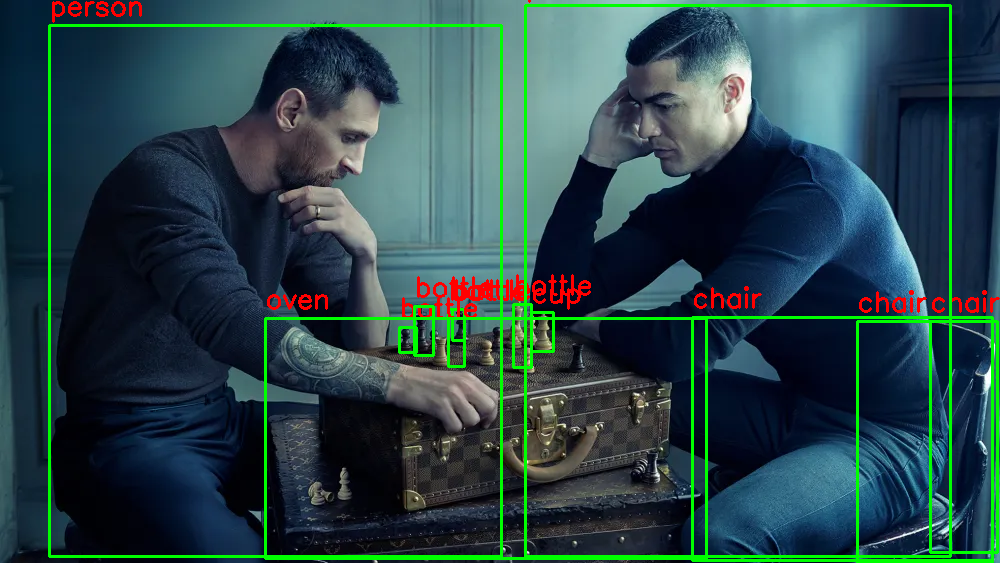

In [4]:
import cv2
image = img_numpy[:,:,::-1].copy()


# Drawing rectangles and labels
for detection in detections:
    bbox = detection['bbox']
    label = detection['class']
    # Draw rectangle
    bbox = [int(box) for box in bbox]
    cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)

    # Draw label
    cv2.putText(image, label, (bbox[0], bbox[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

image = image[:,:,::-1]
Image.fromarray(image)

As this image contains objects that are not represented in the classes of our object detector we can not expect to detect those. (For example Chess pieces which are identified as bottles)
Furthermore there are certain objects that are detected with low confidence.
To get a higher percentage of correct detections, we only focus on the confidence levels over 0.5:

In [5]:

for detection in detections:
    if detection['conf'] < 0.5:
        continue
    label = detection['class']
    print(label)

chair
person
person


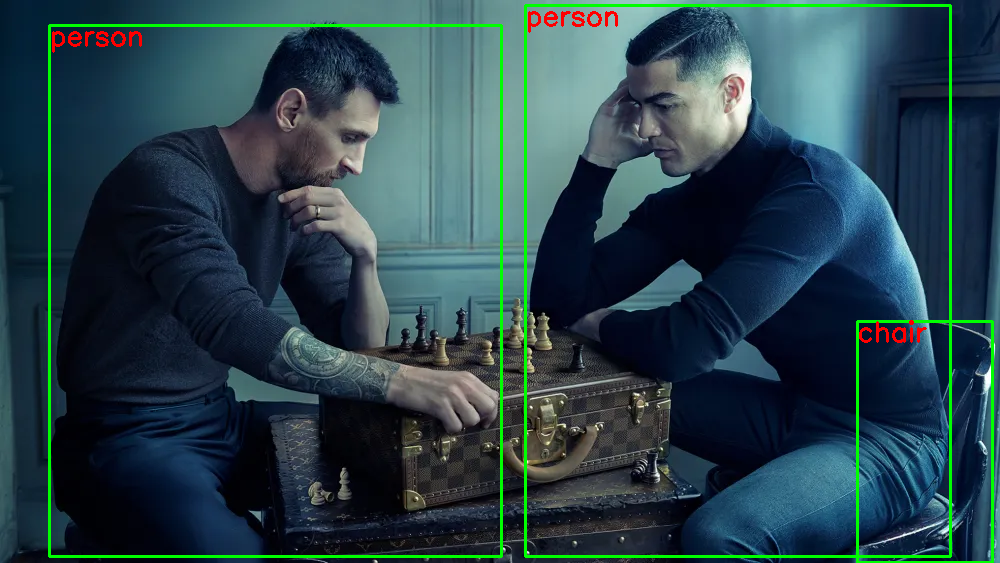

In [6]:
image = img_numpy[:,:,::-1].copy()
for detection in detections:
    bbox = detection['bbox']
    label = detection['class']
    if detection['conf'] < 0.5:
            continue
    # Draw rectangle
    bbox = [int(box) for box in bbox]
    cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)

    # Draw label
    cv2.putText(image, label, (bbox[0], bbox[1] + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

image = image[:,:,::-1]
Image.fromarray(image)

As we can see the detection is much more clear now and correctly detects the 2 people and the chair.